This notebook visualises strain distributions as histograms to try to spot obvious outlying cells with extreme values of positive strain that skew global & regional mean strain results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT-{case_ind}' for case_ind in f20_cases]
ebr=['EBR-01', 'EBR-02']
f20_cases = f20_cases + ebr

case_list = ['01', '02', '05', '06', '07', '08', '09', '10', '12', '14', '15', '16', '17', '18', '19', '20',
             '21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
case_list = [f'CT-CRT-{case}' for case in case_list]
case_list = case_list + ebr

In [5]:
## checking percentile ranges for all cases

arch='endo_avg'
time_frame='9'

lower=0
upper=99


for case in case_list:
    if case in f20_cases:
        filepath=f'~/Dropbox/phd/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/{arch}-strains-t{time_frame}.txt'
    else:
        filepath=f'~/Dropbox/phd/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/{arch}-strains-t{time_frame}.txt'
        
    df = pd.read_csv(filepath, skiprows=2, names=['f1', 'f2', 'f3'], sep=' ')
    
    percentile=np.zeros((3,2))
    percentile[0, :] = np.percentile(df['f1'], [lower, upper])
    percentile[1, :] = np.percentile(df['f2'], [lower, upper])
    percentile[2, :] = np.percentile(df['f3'], [lower, upper])
    
    print(f"""{case} percentiles:
        f1: {percentile[0,:]}
        f2: {percentile[1,:]}
        f3: {percentile[2,:]}""")

CT-CRT-01 percentiles:
        f1: [-0.357911   0.2497648]
        f2: [-0.397964   0.3340138]
        f3: [-3.928770e-15  3.512932e-16]
CT-CRT-02 percentiles:
        f1: [-0.310759    0.43149751]
        f2: [-0.31504     0.39714002]
        f3: [-1.1734200e-15  3.8139877e-16]
CT-CRT-05 percentiles:
        f1: [-0.41311     0.37089935]
        f2: [-0.429123    0.41462671]
        f3: [-3.7772500e-15  3.7347914e-16]
CT-CRT-06 percentiles:
        f1: [-0.450992    0.48878024]
        f2: [-0.448049   0.5071063]
        f3: [-1.8231600e-15  3.7339594e-16]
CT-CRT-07 percentiles:
        f1: [-0.499866   1.2203524]
        f2: [-0.499295  1.199621]
        f3: [-9.557970e-16  6.567697e-16]
CT-CRT-08 percentiles:
        f1: [-0.101447   0.0545806]
        f2: [-0.0874185   0.05347635]
        f3: [-6.11134e-15  3.41801e-16]
CT-CRT-09 percentiles:
        f1: [-0.334854    0.29626124]
        f2: [-0.381294    0.34134216]
        f3: [-3.2760400e-15  3.5055216e-16]
CT-CRT-10 percentiles

For both endo_avg and epi_avg, time frame 4, for all cases the 0th - 99th percentile of all fibre strain componeonts is between -0.5 and 3.

In [3]:
path2strain_txt='/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases/CT-CRT-26/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/endo_avg_excl_PVs_meanstrains_post_excl_PVs.txt'

file = np.loadtxt(path2strain_txt)

file[1]

array([ 0.        , 46.14050653, 55.97530437, 58.95931692, 51.56445266,
       46.92507736, 38.67950651, 40.38054588, 36.12013792, 40.4833648 ])

<AxesSubplot:ylabel='Frequency'>

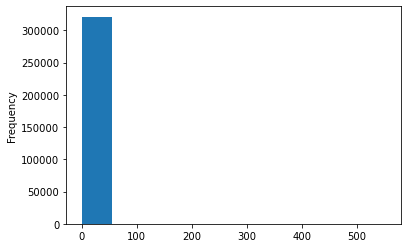

In [4]:
path2strain_txt_pl = Path(path2strain_txt)

df = pd.read_csv(f'{path2strain_txt_pl.parent}/endo_avg-strains-t4.txt', skiprows=2, names=['f1', 'f2', 'f3'], sep=' ')

df['f1'].plot.hist(bins=10)

(-1.0, 1.0)

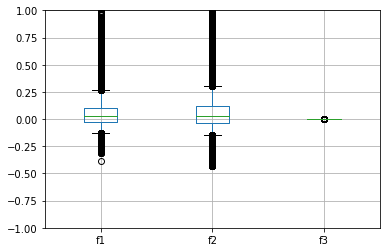

In [5]:
df.boxplot(whis=[5,95])
plt.ylim(-1,1)

In [12]:
percentile = np.percentile(df['f2'], [0, 99])
percentile

array([-0.435779  ,  0.48577992])

In [75]:
quartiles = np.percentile(df['f1'], [25, 75])
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
iqr

0.1350452

(-1.0, 2.0)

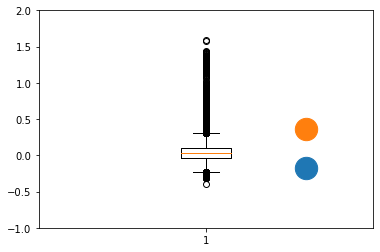

In [77]:
plt.boxplot(df['f1'])
plt.scatter(1.3,percentile[0],s=500)
plt.scatter(1.3,percentile[1],s=500)
plt.ylim(-1,2)

<AxesSubplot:ylabel='Frequency'>

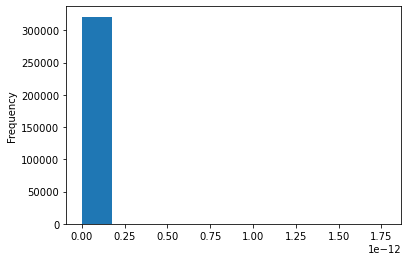

In [38]:
df['f3'].plot.hist(bins=10)

In [41]:
df.max()

f1    5.535050e+02
f2    2.467170e+04
f3    1.777000e-12
dtype: float64

In [87]:
df.min()

f1   -3.900990e-01
f2   -4.357790e-01
f3   -1.531910e-15
dtype: float64

In [44]:
df.mean()

f1    4.775639e-02
f2    1.277084e-01
f3    1.775332e-17
dtype: float64

In [43]:
df.median()

f1    2.837940e-02
f2    3.283200e-02
f3    9.404580e-18
dtype: float64

In [90]:
np.percentile(df.to_numpy(), [0,95])

array([-0.435779,  0.244885])

In [92]:
np.percentile(df['f1'].to_numpy(), [0,95])

array([-0.390099 ,  0.2706505])

In [93]:
np.percentile(df['f1'], [0,95])

array([-0.390099 ,  0.2706505])

In [86]:
df[df['f1'] < percentile[1]]

,f1,f2,f3
0,0.009533,-0.286684,7.182390e-17
1,0.034689,-0.299358,-2.712550e-16
2,0.010430,-0.280518,-1.686670e-16
3,-0.140422,-0.126699,8.270150e-17
4,-0.113569,-0.134268,3.014850e-17
...,...,...,...
321030,0.028658,0.058677,-3.775820e-17
321031,-0.034155,0.109449,-1.694770e-16
321032,-0.014577,0.108659,1.881690e-16
321033,-0.036727,0.096210,1.387810e-16
